# Notebook Sistem Rekomendasi Content Based 
- Nama : I Gede Teguh Permana

# Project Overview
Perkembangan teknologi informasi dan telekomunikasi terus mengalami peningkatan yang signifikan. Saat ini, hampir semua aspek kehidupan manusia memanfaatkan teknologi informasi dan komunikasi, termasuk dalam bidang musik dan perfilman. Film, sebagai media audio-visual, menawarkan beragam genre, seperti komedi, drama, horor, action, dan lainnya, yang membuatnya menjadi salah satu bentuk hiburan yang sangat populer di masyarakat.

Sejak tahun 1874 hingga 2015, tercatat sebanyak 3.361.741 judul film telah dirilis oleh industri perfilman. Jumlah judul yang begitu banyak sering kali menimbulkan kendala bagi penikmat film dalam menentukan film berikutnya yang akan ditonton. Informasi tentang film yang tersedia di berbagai situs web dapat diolah dan dimanfaatkan untuk memberikan rekomendasi film kepada pengguna lain. Masalah ini dapat diatasi dengan menyajikan daftar film yang direkomendasikan berdasarkan preferensi masing-masing pengguna. Oleh sebab itu, diperlukan sebuah sistem yang mampu memberikan rekomendasi film secara personal kepada pengguna.

Sistem rekomendasi adalah mekanisme yang mampu menyediakan informasi atau saran yang sesuai dengan minat pengguna berdasarkan data yang diperoleh dari pengguna tersebut. Oleh karena itu, dibutuhkan model rekomendasi yang efektif agar saran yang diberikan sistem sesuai dengan selera pengguna, sekaligus memudahkan pengguna dalam membuat keputusan terkait film yang akan ditonton. Salah satu metode yang banyak digunakan dalam sistem rekomendasi adalah Collaborative Filtering. Metode ini menghubungkan pengguna yang memiliki kesamaan preferensi terhadap suatu item (film) berdasarkan penilaian atau rating yang mereka berikan.

## Business Understanding
### 1. Problem Statements
Berdasarkan latar belakang yang telah dijelaskan, permasalahan dapat dirumuskan sebagai berikut:
- Bagaimana meningkatkan pengalaman pengguna dalam menemukan film yang diinginkan?
- Bagaimana cara mengimplementasikan pendekatan *collaborative filtering* dalam membangun sistem rekomendasi film?

### 2. Goals
Proyek ini bertujuan untuk:
- Meningkatkan pengalaman pengguna dalam mencari film yang sesuai dengan preferensi mereka.
- Mengaplikasikan metode collaborative filtering untuk merancang sistem rekomendasi film yang efektif.

### 3. Solusi
Berdasarkan rumusan masalah dan tujuan yang telah ditetapkan, solusi yang diusulkan adalah sebagai berikut:
- Mengimplementasikan pendekatan collaborative filtering dalam membangun sistem rekomendasi film. Metode ini dipilih karena data yang digunakan dalam proyek ini mencakup penilaian pengguna terhadap film-film yang telah mereka tonton. Pada pendekatan collaborative filtering, atribut utama yang dimanfaatkan adalah perilaku pengguna, seperti memberikan rekomendasi film berdasarkan riwayat penilaian dari pengguna tersebut maupun pengguna lainnya.

# Data Understanding
Dataset yang digunakan dalam proyek ini diambil dari website kaggle.com dan dapat diakses melalui tautan berikut: Movie Lens Dataset https://www.kaggle.com/datasets/suryadeepti/movie-lens-dataset (data collection). Dataset ini memiliki format .csv yang terdiri dari dua file, yaitu movies.csv dan ratings.csv. Berikut adalah deskripsi dari masing-masing file tersebut:
1. movies.csv
- File ini berisi 9.742 baris dengan 3 kolom, yaitu:
    - movieId, merupakan *unique Id* untuk masing-masing film
    - title: Nama atau judul film, termasuk tahun rilis yang dicantumkan dalam tanda kurung.
    - genre: Genre atau kategori film
2. ratings.csv
- File ini berisi 100.836 baris dengan 4 kolom, yaitu:
    - userId: *unique Id* untuk masing-masing *user*
    - movieId: *unique Id* untuk masing-masing film
    - rating: Penilaian berupa skor oleh user terhadap suatu film
    - timestamp: Waktu penilaian oleh user terhadap suatu film

### Data Collection
Data diambil dengan menggunakan kaggle API berdasarkan tautan https://www.kaggle.com/datasets/suryadeepti/movie-lens-dataset. Tahapan yang sebelumnya bisa dilakukan adalah:
1. Mempersiapkan Json file yang dapat di request pada akun kaggle, kemudian download dan letakan kedalam direktori code.
2. Melakukan proses download dataset berdasarkan keyword direct halaman dataset pada kaggle (suryadeepti/movie-lens-dataset)
3. Data yang di download akan dalam bentuk ZIP file yang mana perlu di ekstrak sebelumnya untuk mendapatkan data CSV agar dapat diproses nantinya.

In [1]:
!kaggle datasets download -d suryadeepti/movie-lens-dataset

Dataset URL: https://www.kaggle.com/datasets/suryadeepti/movie-lens-dataset
License(s): unknown
movie-lens-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

import tensorflow as tf
import keras
from keras.models import Model
from keras import layers
from tensorflow.keras.optimizers import Adam
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

In [3]:
zip_file = 'movie-lens-dataset.zip'
zip_file = zipfile.ZipFile(zip_file, 'r')
zip_file.extractall()
zip_file.close()

## Data Load
Data Load dilakukan untuk mengekstrak data movie dan ratings  dengan pandas yang di implementasikan read_csv untuk dapat melihat keadaan dari data berdasarkan data yang sudah di lakukan proses data collection.

In [2]:
data_movie = pd.read_csv(r'Data\movies.csv')
data_ratings = pd.read_csv(r'Data\ratings.csv')

### Data Movie
Adapun uraian fitur pada data movie adalah:
- File ini berisi 9.742 baris dengan 3 kolom, yaitu:
    - movieId, merupakan *unique Id* untuk masing-masing film
    - title: Nama atau judul film, termasuk tahun rilis yang dicantumkan dalam tanda kurung.
    - genre: Genre atau kategori film

Data Movie dapat dilihat keadaan dari data tersebut dengan `head` method untuk melihat penjabaran nilai data pada movie, yang mana terdapat tiga fitur (movieId, title, genres).

In [3]:
data_movie.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


`info` method untuk melihat keadaan informasi yang terdapat pada table movie, yang mana pada fitur movieId memiliki tipe data integer, title serta genres mengandung tipe data object. 

In [4]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


`null check` dengan sum setiap row data yang mengandung null yang mana tidak ada nya null data untuk setiap fitur data (movieId, title, genres).

In [5]:
np.sum(data_movie.isnull())

d:\Materi_data-science\Dicoding_Rekomendasi\env\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


movieId    0
title      0
genres     0
dtype: int64

`duplicated` dengan sum setiap row data yang mengandung duplicate, yang mana diperoleh bahwa tidak ada nya duplicated data untuk setiap fitur data (movieId, title, genres).

In [6]:
np.sum(data_movie.duplicated())

np.int64(0)

### Data Rating
Adapun penjelasan dari fitur data yang ada pada data rating:
- File ini berisi 100.836 baris dengan 4 kolom, yaitu:
    - userId: *unique Id* untuk masing-masing *user*
    - movieId: *unique Id* untuk masing-masing film
    - rating: Penilaian berupa skor oleh user terhadap suatu film
    - timestamp: Waktu penilaian oleh user terhadap suatu film

Data Rating dapat dilihat keadaan dari data tersebut dengan `head` method untuk melihat penjabaran nilai data pada rating, yang mana terdapat empat fitur (userId, movieId, rating, timestamp).

In [7]:
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


`info` method untuk melihat keadaan informasi yang terdapat pada table rating.

In [8]:
data_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


 `null check` dengan sum setiap row data yang mengandung null, yang mana diperoleh bahwa tidak ada nya null data untuk setiap fitur data (userId, movieId, rating, timestamp).

In [9]:
np.sum(data_ratings.isnull())

d:\Materi_data-science\Dicoding_Rekomendasi\env\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

`duplicated` dengan sum setiap row data yang mengandung null, yang mana diperoleh bahwa tidak ada nya null data untuk setiap fitur data (userId, movieId, rating, timestamp)

In [10]:
np.sum(data_ratings.duplicated())

np.int64(0)

Knowledge: 
- Terdapat 3 fitur pada movie, dan 4 fitur pada ratings. Dilihat pada movieId adalah sebuah foreign key untuk data movie sehingga data bisa di merge

# Data Preparation
Pada data preparation dilakukan sebuah tahapan memproses data yang mana tahapan pemrosesan data terdiri dari proses `drop kolom`, `merge data`, `Normalize fitur`, `Encode fitur`, dan `split data`. 

### Drop Kolom
Pada drop kolom dilakukan pada kolom /fitur timestamp pada data ratings dikarenakan `timestamp` tidak digunakan untuk rekomendasi maka bisa di drop

In [11]:
data_ratings = data_ratings.drop(['timestamp'], axis=1)

### Merge Data
- Merge data movie dan data ratings berdasarkan fitur movieId, dikarenakan fitur movieid adalah foreign key, proses merge data dilakukan dengan inner join method yang berarti hanya baris baris yang memiliki nilai movieId yang sama di kedua dataframe akan disertakan dalam data frame hasil (data ratings terhadap data movie)

In [14]:
data = data_ratings.merge(data_movie, how='inner', on='movieId')
data.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### Normalize the fitur rating
Normalisasi dilakukan dengan metode normalisasi min-max dengan mengubah setiap nilai dalam kolom menjadi pecahan dari batas bawah hingga batas atas sehingga nilai nilai tersebut berada dalam rentang antara 0 dan 1. Pada pemrosesan yang dilakukan di kalkulasi dengan memproses fitur rating sehingga di peroleh nilai rata-rata rating berdasarkan perhitungan min-max scaller. lalu mengkodekan kolom userId dan movieId menjadi indeks integer dan mencetak jumlah userId dan movieId unik, nilai minimum dan maksimum dari rating. 

In [15]:
batas_bawah = min(data['rating'])
batas_atas = max(data['rating'])
data['rating'] = data['rating'].apply(lambda x : (x - batas_bawah) / (batas_atas - batas_bawah)).values.astype(np.float32)
avg_rating = np.mean(data['rating'])

In [16]:
print('Rata Rata Rating oleh setiap user:', avg_rating)

Rata Rata Rating oleh setiap user: 0.6670127


### Encoder UserId and MovieId
Proses generate `user` dan `movie` fitur dilakukan dalam DataFrame data menjadi indeks integer, proses yang dilakukan di awali dengan mengambil nilai userId unik dan konversi menjadi draft daftar yang mana proses yang sama dilakukan pada movieId dalam data frame diubah menjadi indeks integer menggunakan dictionary yang telah di buat.
- Akhirnya dapat diperoleh jumlah dari userId dan movieId unik, digunakan untuk memudahkan manipulasi data dan analisis lebih lanjut karena indeks integer lebih efisien dan mudah diolah dalam model rekomendasi.

In [17]:
userId = data['userId'].unique().tolist()
encoderUser = { x : i for i, x in enumerate(userId)}

encodertoUser = { i : x for i, x in enumerate(userId)}

data['user'] = data['userId'].map(encoderUser)
n_user = len(encoderUser)

movieId = data['movieId'].unique().tolist()

encoderMovie = { x: i for i, x in enumerate(movieId)}
encodertoMovie = { i : x for i, x in enumerate(movieId)}

data['movie'] = data['movieId'].map(encoderMovie)
n_movie = len(encoderMovie)

dari hasil pemrosesan encoder UserId dan MovieId dapat dilihat bahwa userId yang memetakan movieId dengan userId yang sama akan memetakan beberapa nilai pada movie yang berbeda yang menandakan ketertarikan setiap user yang berbeda terhadap beragam jenis movie

In [18]:
data

,userId,movieId,rating,title,genres,user,movie
0,1,1,0.777778,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0
1,1,3,0.777778,Grumpier Old Men (1995),Comedy|Romance,0,1
2,1,6,0.777778,Heat (1995),Action|Crime|Thriller,0,2
3,1,47,1.000000,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,3
4,1,50,1.000000,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,4
...,...,...,...,...,...,...,...
100831,610,166534,0.777778,Split (2017),Drama|Horror|Thriller,609,3120
100832,610,168248,1.000000,John Wick: Chapter Two (2017),Action|Crime|Thriller,609,2035
100833,610,168250,1.000000,Get Out (2017),Horror,609,3121
100834,610,168252,1.000000,Logan (2017),Action|Sci-Fi,609,1392


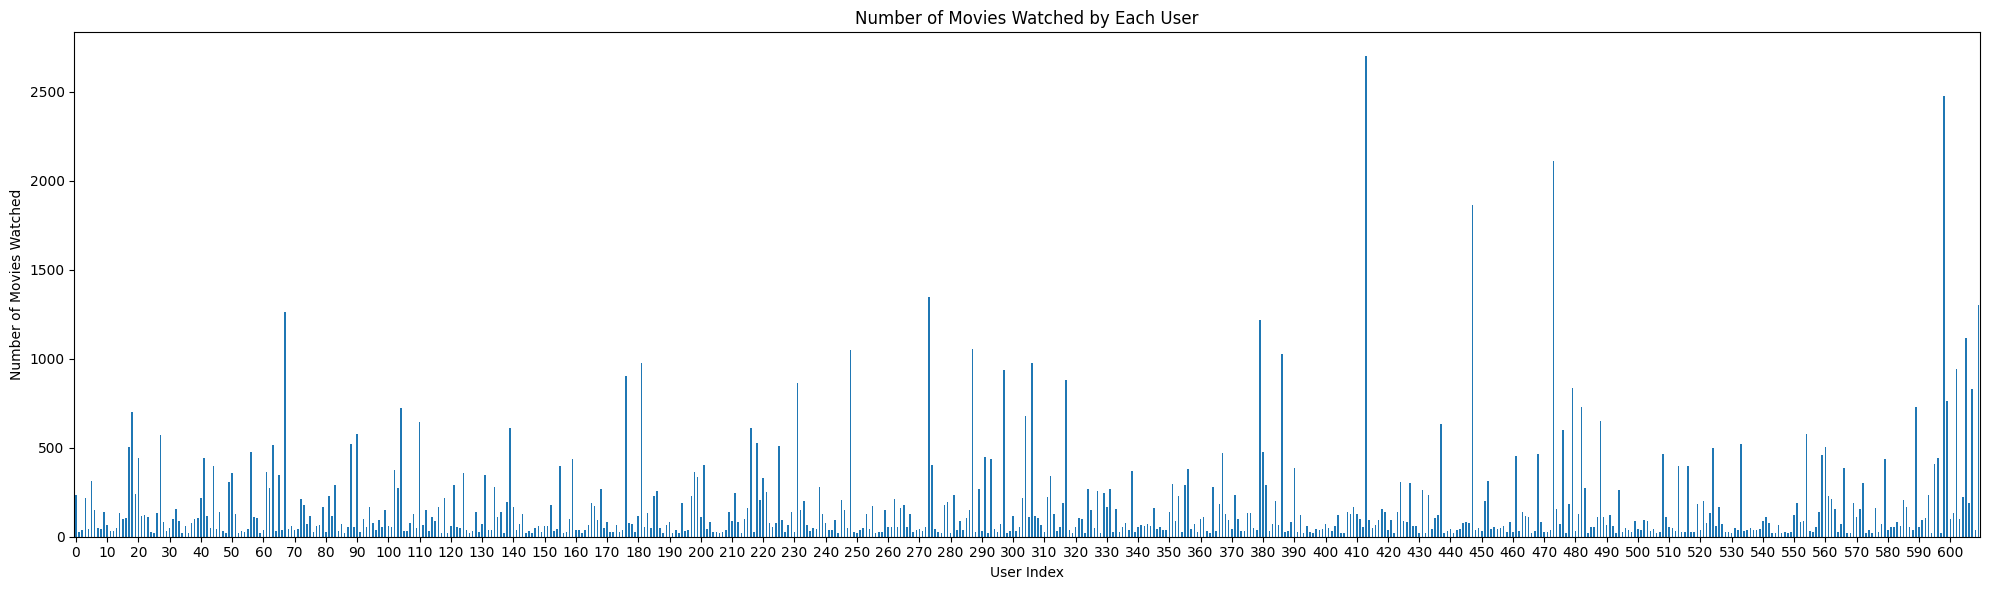

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung jumlah film yang dilihat oleh setiap user
user_movie_counts = data.groupby('user').size()

# Membuat bar chart
user_movie_counts.plot(kind='bar', figsize=(20, 6))
plt.xlabel('User Index')
plt.ylabel('Number of Movies Watched')
plt.title('Number of Movies Watched by Each User')

# Menampilkan setiap rasio ke-10 pada sumbu x
x_ticks = list(range(0, len(user_movie_counts), 10))  
x_labels = [user_movie_counts.index[i] for i in x_ticks]
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=0)

plt.tight_layout()  
plt.show()


Dari grafik jumlah movie yang ditonton oleh setiap user diperoleh bahwa, ada beberapa user yang menonton movie sangat tinggi (413, dan 588) adapun yang menonton movie sangat rendah, sehingga cukup stabil perkembangan jumlah user dalam menonton movie

In [20]:
print('Jumlah User: {}'.format(n_user))
print('Jumlah Movie: {}'.format(n_movie))

print('Batas Bawah: {}'.format(min(data['rating'])))
print('Batas Atas: {}'.format(max(data['rating'])))

Jumlah User: 610
Jumlah Movie: 9724
Batas Bawah: 0.0
Batas Atas: 1.0


### Data Split
Proses split data dilakukan dengan membabi data menjadi data train dan test, yang mana pembagian data dirujuk pada variabel X (user, movie) yang digunakan untuk representasi fitur data dan y (rating) yang digunakan untuk representasi label data.
- Adapun ukuran pembagian data di dasari pada ukuran test data yakni 200000, sedangkan pada ukuran train data menyesuaikan yang di impelementasikan dengan metode indeks slicing.
- Sehingga diperoleh bahwa train data sebesar 1672:  dan test data sebesar : 99164

In [21]:
X = data[['user', 'movie']].values
y = data['rating']

# membagi data
test_size = int(2e5)
indices =  data.shape[0] - test_size
X_train, X_test, y_train, y_test = (X[:indices], X[indices:], y[:indices], y[indices:])

X_train = [X_train[:, 0], X_train[:, 1]]
X_test = [X_test[:, 0], X_test[:, 1]]

print('train_size:', np.shape(X_train)[1])
print('test_size:',np.shape(X_test)[1])

train_size: 1672
test_size: 99164


# Modeling & Result 

## Model
Proses modeling dilakukan dengan menggunakan model deep learning dengan model arsitektur sebagai berikut: 
- Input layer
- Embedding layer
- Dot product layer
- Flatten layer
- Dense layer
- Output layer

Dari setiap model yang disusun berdasarkan arsitektur tersebut dilakukan inisialisasi model berdasarkan input user dan movie yang digunakan sebagai representasi fitur data, X di output layer sebagai representasi label data.
setiap model di compile dengan loss function, metrics, dan optimizer.

In [22]:
def model_architecture():
    user = Input(name='user', shape=[1])
    user_embed = Embedding(name='user_embedding', input_dim= n_user, output_dim=128)(user)
    
    movie = Input(name='movie', shape=[1])
    movie_embed = Embedding(name = 'movie_embedding', input_dim=n_movie, output_dim=128)(movie)
    
    X = Dot(name = 'dot_product', normalize=True, axes=2)([user_embed, movie_embed])
    X = Flatten()(X)
    X = Dense(1, kernel_initializer='he_normal')(X)
    X = Activation('sigmoid')(X)
    
    model = Model(inputs = [user, movie], outputs = X)
    model.compile(loss= 'binary_crossentropy',
                  metrics = ['mse', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                  optimizer = 'Adam')
    return model

In [23]:
model = model_architecture()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │     78,080 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_embedding     │ (None, 1, 128)    │  1,244,672 │ movie[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1, 1)      │          0 │ user_embedding[0… │
│                     │                   │            │ movie_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1)         │          0 │ dot_product[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │          2 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1)         │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,322,754 (5.05 MB)

 Trainable params: 1,322,754 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Correcting the filepath to match the expected format
model_checkpoint = ModelCheckpoint(filepath='./weight.weights.h5',
                             save_weights_only=True,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

early_stopping = EarlyStopping(patience=1, 
                               monitor='mse', 
                               mode='min', 
                               restore_best_weights=True)

my_callbacks = [model_checkpoint, early_stopping]


In [25]:
history = model.fit(x = X_train,
                    y = y_train,
                    validation_data = (X_test, y_test),
                    epochs = 30,
                    batch_size = 32,
                    verbose = 1,
                    callbacks = my_callbacks)

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.6921 - mse: 0.1021 - precision: 0.9780 - recall: 0.5525 - val_loss: 0.6858 - val_mse: 0.0776 - val_precision: 0.9866 - val_recall: 0.7135
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.6401 - mse: 0.0738 - precision: 0.9993 - recall: 0.8882 - val_loss: 0.6794 - val_mse: 0.0744 - val_precision: 0.9867 - val_recall: 0.8339
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.5923 - mse: 0.0545 - precision: 1.0000 - recall: 0.8824 - val_loss: 0.6742 - val_mse: 0.0718 - val_precision: 0.9868 - val_recall: 0.8994
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.5606 - mse: 0.0372 - precision: 1.0000 - recall: 0.8760 - val_loss: 0.6702 - val_mse: 0.0698 - val_precision: 0.9868 - val_recall: 0.9320
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.5415 - mse: 0.0258 - precision: 1.0000 - recall: 0.8770 - val_loss: 0.6670 - val_mse: 0.0683 - val_precision: 0.9866 - val_recall: 0.9508
Epoch

In [ ]:
def weight_model(name, model):
    weight = model.get_layer(name).get_weights()[0]
    weight = weight / np.linalg.norm(weight, axis = 1).reshape((-1, 1))
    return weight

movie_weight = weight_model('movie_embedding', model)
user_weight = weight_model('user_embedding', model)

## Result
Dalam proyek ini digunakan model dengan teknik embedding, yaitu Neural Collaborative Filtering (NCF). NCF adalah sebuah jaringan saraf tiruan yang menerapkan metode collaborative filtering berdasarkan umpan balik implisit, yang mampu merekomendasikan produk berdasarkan interaksi antara pengguna dan item. Sebagai contoh, model ini dapat merekomendasikan film berdasarkan skor rating yang diberikan oleh pengguna. 

### Result to get the similar Users
Fungsi get_similar_users bertujuan untuk mengidentifikasi pengguna yang mirip berdasarkan parameter tertentu. Fungsi ini membutuhkan tempId (identifikasi sementara pengguna) dan n (jumlah pengguna mirip yang ingin ditemukan, dengan default 10). Dalam fungsi ini, index diatur ke tempId dan weights diinisialisasi dengan user_weight, yang mungkin merupakan matriks bobot pengguna. Fungsi kemudian menghitung jarak (atau kesamaan) antara pengguna yang dicari dan seluruh pengguna lainnya menggunakan np.dot. Hasil dari perhitungan jarak diurutkan dengan np.argsort dan mengambil n pengguna dengan jarak terdekat menggunakan indeks terurut.

Setelah pengguna dengan jarak terdekat ditemukan, fungsi akan mencetak ID pengguna yang mirip dan menyimpan pasangan pengguna dengan tingkat kemiripannya dalam SimilarArr. Setelah iterasi selesai, output disimpan dalam bentuk DataFrame Frame dan dikembalikan sebagai hasil akhir.

In [ ]:
def get_similar_users(tempId, n = 10):
      index = tempId
      weights = user_weight
      dists = np.dot(weights, weights[encoderUser.get(index)])
      sortedDists = np.argsort(dists)
      n += 1
      closest = sortedDists[-n:]
      print('User that similar to user #{}'.format(tempId))
      
      SimilarArr = []
      
      for close in closest:
          similarity = dists[closest]

          if isinstance(tempId, int):
              SimilarArr.append({"similar_users" : encodertoUser.get(close), "similarity" : similarity})

      Frame = pd.DataFrame(SimilarArr)
      return Frame

In [ ]:
get_similar_users(393)['similar_users']

User that similar to user #393


0     459
1     186
2     450
3     568
4       1
5     406
6     602
7     323
8     264
9      81
10    393
Name: similar_users, dtype: int64

### Result to get movie preference with Top-n
Untuk mendapatkan result mengenai top-n berdasarkan perilaku pengguna, dapat menggunakan fungsi movie_preference. Berikut adalah tahapan untuk mendapatkan daftar rekomendasi film berdasarkan perilaku pengguna, yang dalam hal ini mencakup pemberian rating terhadap film yang telah ditonton:

1. Mengidentifikasi daftar film yang telah ditonton oleh pengguna, kemudian data tersebut dimasukkan ke dalam dataframe baru dengan parameter userId, plot diatur ke False, dan temp diatur bernilai 1.
2. Menentukan film dengan rating terendah dari data yang sesuai, menggunakan parameter rating_df.userId dengan nilai yang sama seperti userId.
3. Membuat referensi film terbaik (top_movie_reference) berdasarkan urutan rating dengan parameter sort_values pada kolom "rating" dan pengaturan ascending bernilai False.
4. Membentuk dataframe baru, user_pref_df, dari dataframe utama movie_df, yang kemudian difilter agar hanya berisi data film yang masuk dalam top_movie_reference. Dalam tahap ini, parameter movie_df difokuskan pada movieId dan menggunakan isin dari top_movie_reference.
5. Menghitung rata-rata rating dari film yang telah dinilai oleh pengguna, menggunakan parameter rating_df.userId dengan nilai yang sama seperti userId.

In [ ]:
def movie_preference(userId, plot = False, temp = 1):
  
  # menentukan batas rating terendah movie
  low_rating = np.percentile(data[data['userId'] == userId]['rating'], 75)
  data[data['userId'] == userId] = data[data['userId'] == userId][data[data['userId'] == userId]['rating'] >= low_rating]
  top_movie_refference = (data[data['userId'] == userId].sort_values(by = "rating", ascending = False)['movieId'].values)
  
  user_pref_df = data[data["movieId"].isin(top_movie_refference)]
  user_pref_df = user_pref_df[["movieId","title", "genres"]]
  
  if temp != 0:
      print("Berikut ini adalah list rekomendasi film dari user dengan id #{} yang telah mereview {} film dengan rata-rata ratingnya adalah = {:.1f}/5.0".format(
        userId, len(data[data['userId']==userId]),
        data[data['userId']==userId]['rating'].mean()*5,
      ))

  return user_pref_df
     

Diperoleh bahwa preference movie yang similar berdasarkan perilaku pengguna 393 adalah sebagai berikut

In [ ]:
reff_user = movie_preference(393, plot = True)
reff_user = pd.DataFrame(reff_user)
reff_user.head(10)

Berikut ini adalah list rekomendasi film dari user dengan id #393 yang telah mereview 68 film dengan rata-rata ratingnya adalah = 5.0/5.0


,movieId,title,genres
25,457.0,"Fugitive, The (1993)",Thriller
62,1089.0,Reservoir Dogs (1992),Crime|Mystery|Thriller
70,1198.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
71,1206.0,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller
89,1291.0,Indiana Jones and the Last Crusade (1989),Action|Adventure
147,2329.0,American History X (1998),Crime|Drama
166,2571.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller
192,2959.0,Fight Club (1999),Action|Crime|Drama|Thriller
197,2997.0,Being John Malkovich (1999),Comedy|Drama|Fantasy
228,3793.0,X-Men (2000),Action|Adventure|Sci-Fi


# Evaluasi Performance
Pada proses evaluasi performance dilakukan untuk mengetahui performa model yang telah dibangun. Dalam hal ini, model akan diuji pada dataset test dan disimpan dalam bentuk grafik. Grafik berikut menunjukkan hasil performa model pada dataset test dan train di setiap epochnya. Pada proses evaluasi dilakukan dengan perhitungan MSE loss, recall, dan precision.

Pada `loss performance` dapat dilihat bahwa loss pada train mengalami penurunan yang cukup signifikan namun pada test loss tidak mengalami penurunan yang cukup signifikan.

`MSE` pada Train mengalami penurunan, sedangkan MSE pada Test cenderung stabil dengan sedikit penurunan yang tidak signifikan

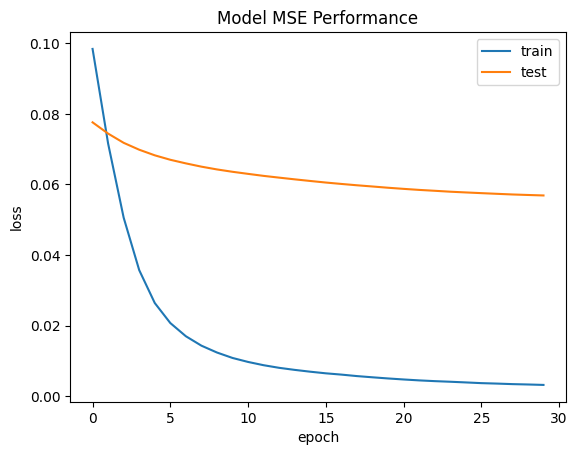

In [27]:
plt.title('Model MSE Performance')
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

`recall` pada Test yang terus meningkat, sementara recall pada Train menunjukkan pola menurun dengan sedikit fluktuasi.

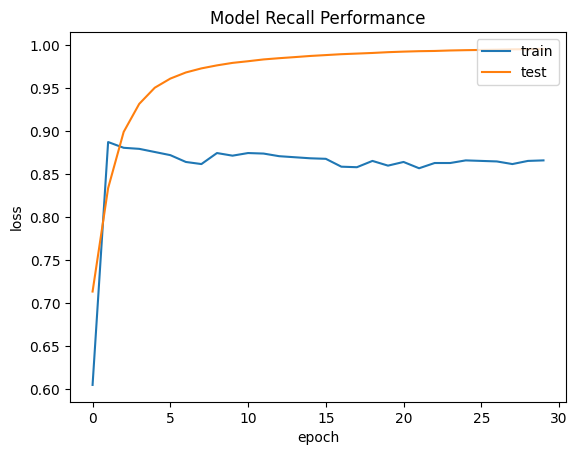

In [28]:
plt.title('Model Recall Performance')
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

`precision` pada Train cenderung meningkat, sementara precision pada Test tetap stabil sepanjang pengujian

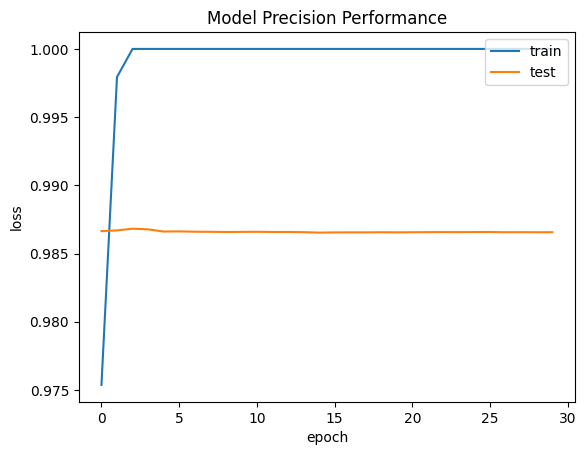

In [29]:
plt.title('Model Precision Performance')
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Kesimpulan
Pada bagian kesimpulan ini berisikan sebuah jawaban dari problem statment berdasarkan result dan evaluasi yang di peroleh
1. Meningkatkan pengalaman pengguna dapat dilakukan dengan implementasi sebuah sistem rekomendasi berdasarkan perilaku pengguna, hal ini dapat dilakukan dengan mendapatkan sebuah similar user yang memiliki perilaku yang mirip dengan perilaku pengguna tersebut, dapat dilihat bahwa paada user 393. Memperoleh sebuah similar user sebagai berikut:
#### User that similar to user #393

| Rank | User ID |
|------|---------|
| 0    | 459     |
| 1    | 186     |
| 2    | 450     |
| 3    | 568     |
| 4    | 1       |
| 5    | 406     |
| 6    | 602     |
| 7    | 323     |
| 8    | 264     |
| 9    | 81      |
| 10   | 393     |

Untuk mengetahui sebuah performa model dalam memetakan similar user berdasarkan perilaku nya, dapat dilihat dari evaluasi model yang di lakukan selama proses training yang mana pada tahap ini terdapat evaluasi pada model MSE, recall, dan precision.
- Nilai Mean Squared Error (MSE) sebesar 0.01 untuk data train dan 0.06 untuk data testing.
- Nilai Precision sebesar 1.0000 untuk data training dan 0.0986 untuk data test
- Nilai Recall sebesar 0.89 untuk data train dan 1.00 untuk data test
Jika dilihat dari performa model bahwa model dapat memetakan similar user dengan baik, dengan nilai pada MSE pada data train dan test sebesar 0.01 dan 0.06. Dan nilai precision dan recall sebesar 1.0000 dan 0.89 untuk data training serta 0.986 dan 1.00 untuk data test. Dengan demikian dapat dikatakan bahwa model dapat memetakan similar user dengan baik. Jika dilihat bahwa loss MSE yang diperoleh 0.01 dan 0.06 yang cukup similar yang mana menandakan bahwa model good fit, sedangkan hasil pada precision dan recal pada data test cukup baik dengan nilai sebesar 0.986 dan 1.00 pada data test yang menandakan bahwa model dapat memetakan similar user dengan baik yang mana false 1 dan false 2 di estimasikan minim terjadi.



2. Cara mengimplementasikan pendekatan collaborative filtering dilakukan berdasarkan kedekatan user nya dengan top-n recommendatin method, berikut tahapan yang dapat dilakukan untuk mengimplementasikan pendekatan collaborative filtering:
    1. Mengidentifikasi daftar film yang telah ditonton oleh pengguna, kemudian data tersebut dimasukkan ke dalam dataframe baru dengan parameter userId, plot diatur ke False, dan temp diatur bernilai 1.
    2. Menentukan film dengan rating terendah dari data yang sesuai, menggunakan parameter rating_df.userId dengan nilai yang sama seperti userId.
    3. Membuat referensi film terbaik (top_movie_reference) berdasarkan urutan rating dengan parameter sort_values pada kolom "rating" dan pengaturan ascending bernilai False.
    4. Membentuk dataframe baru, user_pref_df, dari dataframe utama movie_df, yang kemudian difilter agar hanya berisi data film yang masuk dalam top_movie_reference. Dalam tahap ini, parameter movie_df difokuskan pada movieId dan menggunakan isin dari top_movie_reference.
    5. Menghitung rata-rata rating dari film yang telah dinilai oleh pengguna, menggunakan parameter rating_df.userId dengan nilai yang sama seperti userId.

### Rekomendasi Film untuk User ID #393

Berikut ini adalah hasil implementasi dengan pendekatan collaborative filtering berdasarkan kedekatan user nya dengan top-n recommendatin method, daftar rekomendasi film  dari user dengan ID #393 yang telah mereview 68 film dengan rata-rata ratingnya adalah 5.0/5.0 yang mana dapat dilihat pada tabel berikut:

| Rank | Movie ID | Title                                                 | Genres                           |
|------|----------|-------------------------------------------------------|----------------------------------|
| 1    | 457.0    | Fugitive, The (1993)                                  | Thriller                         |
| 2    | 1089.0   | Reservoir Dogs (1992)                                 | Crime|Mystery|Thriller           |
| 3    | 1198.0   | Raiders of the Lost Ark (Indiana Jones and the...)    | Action|Adventure                 |
| 4    | 1206.0   | Clockwork Orange, A (1971)                            | Crime|Drama|Sci-Fi|Thriller      |
| 5    | 1291.0   | Indiana Jones and the Last Crusade (1989)             | Action|Adventure                 |
| 6    | 2329.0   | American History X (1998)                             | Crime|Drama                      |
| 7    | 2571.0   | Matrix, The (1999)                                    | Action|Sci-Fi|Thriller           |
| 8    | 2959.0   | Fight Club (1999)                                     | Action|Crime|Drama|Thriller      |
| 9    | 2997.0   | Being John Malkovich (1999)                           | Comedy|Drama|Fantasy             |
| 10   | 3793.0   | X-Men (2000)                                          | Action|Adventure|Sci-Fi          |
